Lab-1 Part-1

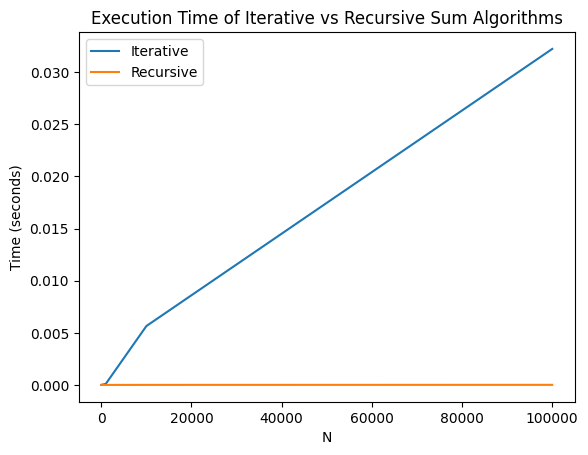

In [2]:
#Q1
import time
import matplotlib.pyplot as plt

def iterative_sum(N):
    result = 0
    for i in range(1, N+1):
        result += i
    return result

def recursive_sum(N):
    return N * (N + 1) // 2

# Measure execution time for different values of N
N_values = [10, 100, 1000, 10000, 100000]  # Adjust as needed
iterative_times = []
recursive_times = []

for N in N_values:
    start_time = time.time()
    iterative_sum(N)
    end_time = time.time()
    iterative_times.append(end_time - start_time)

    start_time = time.time()
    recursive_sum(N)
    end_time = time.time()
    recursive_times.append(end_time - start_time)

# Plotting
plt.plot(N_values, iterative_times, label='Iterative')
plt.plot(N_values, recursive_times, label='Recursive')
plt.xlabel('N')
plt.ylabel('Time (seconds)')
plt.title('Execution Time of Iterative vs Recursive Sum Algorithms')
plt.legend()
plt.show()


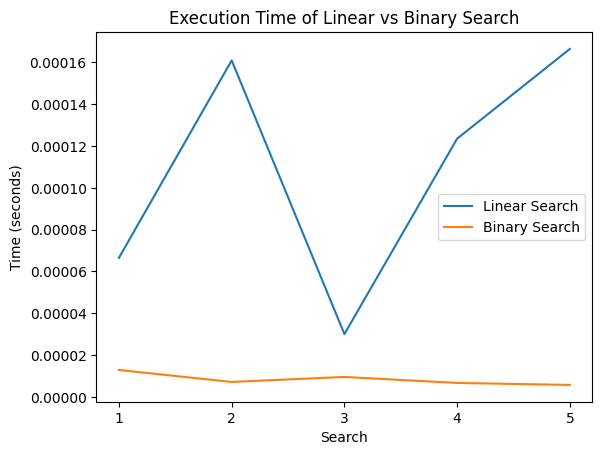

In [3]:
#Q2
import time
import random
import matplotlib.pyplot as plt

# Linear search function
def linear_search(arr, key):
    for i in range(len(arr)):
        if arr[i] == key:
            return i
    return -1

# Binary search function
def binary_search(arr, key):
    low = 0
    high = len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == key:
            return mid
        elif arr[mid] < key:
            low = mid + 1
        else:
            high = mid - 1
    return -1

# Generate random array
array = [random.randint(1, 1000) for _ in range(10000)]

# Perform searches and measure time
search_keys = [random.randint(1, 1000) for _ in range(5)]
linear_times = []
binary_times = []

for key in search_keys:
    start_time = time.time()
    linear_search(array, key)
    end_time = time.time()
    linear_times.append(end_time - start_time)

    start_time = time.time()
    binary_search(array, key)
    end_time = time.time()
    binary_times.append(end_time - start_time)

# Plotting
plt.plot(range(1, 6), linear_times, label='Linear Search')
plt.plot(range(1, 6), binary_times, label='Binary Search')
plt.xlabel('Search')
plt.ylabel('Time (seconds)')
plt.title('Execution Time of Linear vs Binary Search')
plt.xticks(range(1, 6))
plt.legend()
plt.show()


In [9]:
#Q3
def string_to_integer(s):
    # Remove commas from the input string
    s = s.replace(',', '')

    # Base case: if the string is empty, return 0
    if not s:
        return 0

    # Convert the last character to integer
    digit = int(s[-1])
    # Recursive call to convert the remaining characters
    remaining = s[:-1]
    # Multiply the integer representation of the remaining string by 10 and add the current digit
    return string_to_integer(remaining) * 10 + digit

def integer_with_commas(n):
    # Convert the integer to a string with commas
    s = str(n)
    result = ''
    # Loop through the string and insert commas
    for i, c in enumerate(s):
        if i > 0 and (len(s) - i) % 3 == 0:
            result += ','
        result += c
    return result

# Example usage:
input_string = input("Enter a string of digits: ")
result = string_to_integer(input_string)
formatted_result = integer_with_commas(result)
print("Formatted integer representation:", formatted_result)



Enter a string of digits: 1234
Formatted integer representation: 1,234


In [10]:
#Q4
def reverse_string(s):
    # Base case: if the string is empty or has only one character, return the string
    if len(s) <= 1:
        return s
    # Recursive step: swap the first and last characters and reverse the remaining substring
    return s[-1] + reverse_string(s[1:-1]) + s[0]

# Example usage:
input_string = input("Enter a string: ")
reversed_string = reverse_string(input_string)
print("Reversed string:", reversed_string)


Enter a string: abcdef
Reversed string: fedcba


In [12]:
#Q5
def is_palindrome(s):
    # Base case: if the string has 0 or 1 characters, it's a palindrome
    if len(s) <= 1:
        return True
    # Check if the first and last characters are the same
    if s[0] != s[-1]:
        return False
    # Recursive step: check if the substring excluding the first and last characters is a palindrome
    return is_palindrome(s[1:-1])

# Example usage:
input_string = input("Enter a string: ")
if is_palindrome(input_string):
    print("The string is a palindrome.")
else:
    print("The string is not a palindrome.")


Enter a string: ABCDEF
The string is not a palindrome.


Lab-1 Part-2

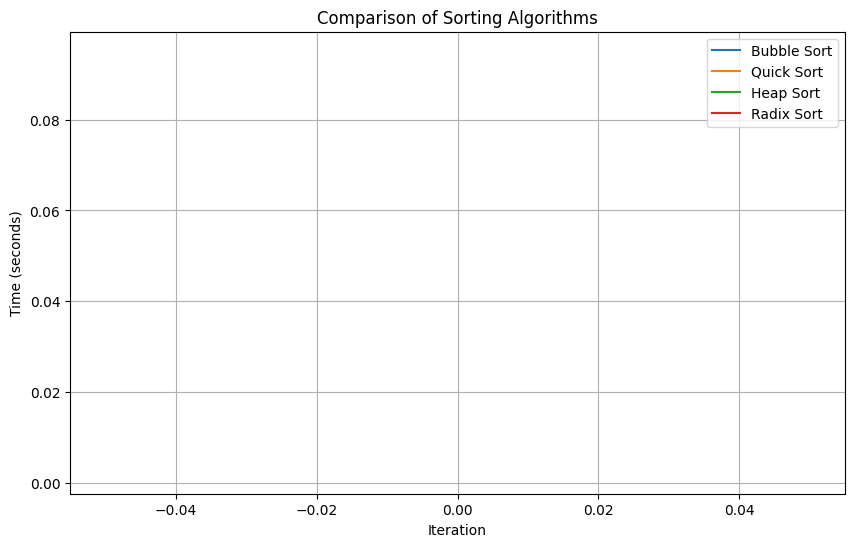

In [13]:
#Q1
import time
import random
import matplotlib.pyplot as plt

# Implement sorting algorithms

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[l] > arr[largest]:
        largest = l

    if r < n and arr[r] > arr[largest]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)

    for i in range(n, -1, -1):
        heapify(arr, n, i)

    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

def radix_sort(arr):
    max_digit = max(arr)
    exp = 1
    while max_digit // exp > 0:
        counting_sort(arr, exp)
        exp *= 10

def counting_sort(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10

    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    i = n - 1
    while i >= 0:
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    for i in range(n):
        arr[i] = output[i]

# Generate random integers
random_numbers = [random.randint(1, 10000) for _ in range(1000)]

# Measure time for each sorting algorithm
sorting_algorithms = {
    "Bubble Sort": bubble_sort,
    "Quick Sort": quick_sort,
    "Heap Sort": heap_sort,
    "Radix Sort": radix_sort
}
times = {algo: [] for algo in sorting_algorithms}

for algo_name, sort_algo in sorting_algorithms.items():
    start_time = time.time()
    sorted_numbers = random_numbers.copy()
    sort_algo(sorted_numbers)
    end_time = time.time()
    execution_time = end_time - start_time
    times[algo_name].append(execution_time)

# Plotting
plt.figure(figsize=(10, 6))
for algo_name, execution_times in times.items():
    plt.plot(execution_times, label=algo_name)

plt.xlabel('Iteration')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Sorting Algorithms')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
#Q2
import heapq

def merge_sorted_lists(lists):
    # Initialize an empty min-heap
    heap = []

    # Insert the first element of each list along with its index into the min-heap
    for i, lst in enumerate(lists):
        if lst:
            heapq.heappush(heap, (lst[0], i, 0))

    # Merge the sorted lists
    result = []
    while heap:
        val, list_index, element_index = heapq.heappop(heap)
        result.append(val)

        # Move to the next element in the list
        element_index += 1
        if element_index < len(lists[list_index]):
            heapq.heappush(heap, (lists[list_index][element_index], list_index, element_index))

    return result

# Take user input for 'm' and 'n'
m = int(input("Enter the number of lists/arrays (m): "))
n = int(input("Enter the number of elements in each list/array (n): "))

# Take user input for each list/array
lists = []
for i in range(m):
    lst = list(map(int, input(f"Enter the sorted list/array {i+1} separated by space: ").split()))
    lists.append(lst)

# Merge the sorted lists and print the sorted result
sorted_result = merge_sorted_lists(lists)
print("Sorted result:", sorted_result)


Enter the number of lists/arrays (m): 3
Enter the number of elements in each list/array (n): 4
Enter the sorted list/array 1 separated by space: 1 3 5 7
Enter the sorted list/array 2 separated by space: 2 3 4 5 
Enter the sorted list/array 3 separated by space: 2 5 7 8 
Sorted result: [1, 2, 2, 3, 3, 4, 5, 5, 5, 7, 7, 8]


In [16]:
#Q3
import heapq

def find_k_largest(nums, k):
    # Create a min heap
    min_heap = []

    # Insert the first K elements into the min heap
    for num in nums[:k]:
        heapq.heappush(min_heap, num)

    # For the remaining elements, if larger than the root, replace and heapify
    for num in nums[k:]:
        if num > min_heap[0]:
            heapq.heappop(min_heap)
            heapq.heappush(min_heap, num)

    # Return the K largest elements
    return min_heap

# Take user input for the array
nums = list(map(int, input("Enter the array elements separated by space: ").split()))

# Take user input for the value of K
k = int(input("Enter the value of K: "))

# Find the K largest elements
result = find_k_largest(nums, k)
print("K largest elements:", result)


Enter the array elements separated by space: 2 3 4 5 6 7 8 9
Enter the value of K: 4
K largest elements: [6, 7, 8, 9]


In [22]:
#Q4
def max_activities(activities):
    # Sort the activities based on their finishing times
    activities.sort(key=lambda x: x[1])

    # Initialize variables to track the maximum number of activities and the finishing time of the last selected activity
    max_count = 0
    last_finish_time = float('-inf')

    # Iterate through the sorted activities
    for activity in activities:
        start_time, finish_time = activity
        # If the start time of the current activity is greater than or equal to the finish time of the last selected activity, select the current activity
        if start_time >= last_finish_time:
            max_count += 1
            last_finish_time = finish_time

    return max_count

# Take user input for the number of activities
num_activities = int(input("Enter the number of activities: "))

# Take user input for each activity
activities = []
for i in range(num_activities):
    start, finish = map(int, input(f"Enter start and finish time of activity {i+1} separated by comma: ").split(','))
    activities.append((start, finish))

# Calculate the maximum number of activities
max_count = max_activities(activities)

# Print the result as ordered pairs with single-digit times
print("Maximum number of activities:", max_count)
print("Ordered pairs:")
for start, finish in activities:
    print(f"({start}, {finish})", end=" ")


Enter the number of activities: 2
Enter start and finish time of activity 1 separated by comma: 1,3
Enter start and finish time of activity 2 separated by comma: 2,4
Maximum number of activities: 1
Ordered pairs:
(1, 3) (2, 4) 

In [26]:
#Q5
def merge_intervals(intervals):
    if not intervals:
        return []

    # Sort the intervals based on their start times
    intervals.sort(key=lambda x: x[0])

    merged = [intervals[0]]  # Initialize the merged list with the first interval

    for interval in intervals[1:]:
        # Check if the current interval overlaps with the last interval in the merged list
        if interval[0] <= merged[-1][1]:
            # Merge the intervals by updating the end time of the last interval in the merged list
            merged[-1] = (merged[-1][0], max(merged[-1][1], interval[1]))
        else:
            # Add the current interval to the merged list
            merged.append(interval)

    return merged

# Take user input for the number of intervals
num_intervals = int(input("Enter the number of intervals: "))

# Take user input for each interval
intervals = []
for i in range(num_intervals):
    start, end = map(int, input(f"Enter start and end time of interval {i+1} separated by space: ").split())
    intervals.append((start, end))

# Merge the intervals and print the non-overlapping merged intervals
merged_intervals = merge_intervals(intervals)
print("Non-overlapping merged intervals:", merged_intervals)


Enter the number of intervals: 4
Enter start and end time of interval 1 separated by space: 1 4
Enter start and end time of interval 2 separated by space: 2 5
Enter start and end time of interval 3 separated by space: 7 8
Enter start and end time of interval 4 separated by space: 6 9
Non-overlapping merged intervals: [(1, 5), (6, 9)]


Lab-1 Part-3

In [28]:
#Q1
def find_pairs_with_sum(arr, target_sum):
    seen = {}  # Initialize an empty dictionary to store the indices of elements

    pairs = []  # Initialize an empty list to store pairs

    for i, num in enumerate(arr):
        complement = target_sum - num
        if complement in seen:
            # Add the current pair and its complement to the list of pairs
            pairs.append((num, complement))
            # Remove the current number from the dictionary to avoid duplicate pairs
            del seen[complement]
        else:
            # Store the index of the current number in the dictionary
            seen[num] = i

    return pairs

# Take user input for the array
arr = list(map(int, input("Enter the unsorted integer array separated by space: ").split()))

# Take user input for the target sum
target_sum = int(input("Enter the target sum: "))

# Find all pairs with the given sum in the array
pairs = find_pairs_with_sum(arr, target_sum)

# Print the pairs as ordered pairs
if pairs:
    print(f"Pairs with sum {target_sum}:")
    for pair in pairs:
        print(f"({pair[0]}, {pair[1]})")
else:
    print("No pairs found with the given sum")


Enter the unsorted integer array separated by space: 1 2 3 4 5 6 
Enter the target sum: 7
Pairs with sum 7:
(4, 3)
(5, 2)
(6, 1)


In [34]:
#Q2
def max_product_pair(arr):
    if len(arr) < 2:
        return None, float('-inf')  # No pair possible

    # Initialize variables with the first two elements of the array
    max_positive = max(arr[0], arr[1])
    second_max_positive = min(arr[0], arr[1])
    min_negative = max(arr[0], arr[1])
    second_min_negative = min(arr[0], arr[1])

    for num in arr[2:]:
        if num >= 0:
            if num > max_positive:
                second_max_positive = max_positive
                max_positive = num
            elif num > second_max_positive:
                second_max_positive = num
        else:
            if num < min_negative:
                second_min_negative = min_negative
                min_negative = num
            elif num < second_min_negative:
                second_min_negative = num

    if max_positive * second_max_positive >= min_negative * second_min_negative:
        max_pair = max_positive, second_max_positive
        max_product = max_positive * second_max_positive
    else:
        max_pair = min_negative, second_min_negative
        max_product = min_negative * second_min_negative

    return max_pair, max_product

# Take user input for the array
arr = list(map(int, input("Enter the unsorted integer array separated by space: ").split()))

# Find the pair with maximum product in the array
pair, max_product = max_product_pair(arr)

# Print the pair with maximum product
if pair:
    print(f"Pair with maximum product: {pair[0]} and {pair[1]}")
    print(f"Maximum product: {max_product}")
else:
    print("No pair found")


Enter the unsorted integer array separated by space: 1 2 3 4 5
Pair with maximum product: 5 and 4
Maximum product: 20


In [37]:
#Q3
def sort_array(arr):
    # Initialize variables to store positions of elements that need to be swapped
    first_swap = None
    second_swap = None

    # Iterate through the array to find the positions of elements that need to be swapped
    for i in range(len(arr) - 1):
        if arr[i] > arr[i + 1]:
            if first_swap is None:
                first_swap = i
            second_swap = i + 1

    # Swap the elements at the identified positions if both positions are valid
    if first_swap is not None and second_swap is not None:
        arr[first_swap], arr[second_swap] = arr[second_swap], arr[first_swap]

# Take user input for the array
arr = list(map(int, input("Enter the sorted integer array with two swapped elements separated by space: ").split()))

# Sort the array in linear time
sort_array(arr)

# Print the sorted array
print("Sorted array:", arr)


Enter the sorted integer array with two swapped elements separated by space: 1 2 3 4 5 7 6
Sorted array: [1, 2, 3, 4, 5, 6, 7]


In [38]:
#Q4
def segregate_zeros_ones(arr):
    left, right = 0, len(arr) - 1

    while left < right:
        if arr[left] == 0 and arr[right] == 1:
            arr[left], arr[right] = arr[right], arr[left]
            left += 1
            right -= 1
        elif arr[left] == 1:
            left += 1
        elif arr[right] == 0:
            right -= 1

# Take user input for the binary array
arr = list(map(int, input("Enter the binary array (0's and 1's separated by space): ").split()))

# Segregate zeros and ones
segregate_zeros_ones(arr)

# Print the segregated array
print("Segregated array:", arr)


Enter the binary array (0's and 1's separated by space): 1 0 1 0 1 0 1 0 1 0
Segregated array: [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


In [43]:
#Q5
def merge(arr, temp_arr, left, mid, right):
    inversion_count = 0
    inversions = []  # List to store the inversions in ordered pairs
    i = left  # Index for left subarray
    j = mid + 1  # Index for right subarray
    k = left  # Index for merged subarray

    while i <= mid and j <= right:
        if arr[i] <= arr[j]:
            temp_arr[k] = arr[i]
            i += 1
        else:
            temp_arr[k] = arr[j]
            j += 1
            inversion_count += (mid - i + 1)  # Count inversions
            # Add all inversions in this merge step to the list
            for x in range(i, mid + 1):
                if j <= right:  # Check if j is within range
                    inversions.append((arr[x], arr[j]))
        k += 1

    while i <= mid:
        temp_arr[k] = arr[i]
        i += 1
        k += 1

    while j <= right:
        temp_arr[k] = arr[j]
        j += 1
        k += 1

    for i in range(left, right + 1):
        arr[i] = temp_arr[i]

    return inversion_count, inversions

def merge_sort(arr, temp_arr, left, right):
    inversion_count = 0
    inversions = []  # List to store all inversions
    if left < right:
        mid = (left + right) // 2
        left_count, left_inversions = merge_sort(arr, temp_arr, left, mid)
        right_count, right_inversions = merge_sort(arr, temp_arr, mid + 1, right)
        inversion_count += left_count + right_count
        merge_count, merge_inversions = merge(arr, temp_arr, left, mid, right)
        inversion_count += merge_count
        inversions.extend(left_inversions)
        inversions.extend(right_inversions)
        inversions.extend(merge_inversions)
    return inversion_count, inversions

def inversion_count(arr):
    n = len(arr)
    temp_arr = [0] * n
    count, inversions = merge_sort(arr, temp_arr, 0, n - 1)
    return count, inversions

# Take user input for the array
arr = list(map(int, input("Enter the array of non-negative integers separated by space: ").split()))

# Calculate inversion count and inversions
count, inversions = inversion_count(arr)

# Print the inversion count
print("Total count of inversions:", count)

# Print all the inversions in ordered pairs
print("Inversions in ordered pairs:")
for pair in inversions:
    print(pair)


Enter the array of non-negative integers separated by space: 1 10 9 3 8 2 7 4 
Total count of inversions: 16
Inversions in ordered pairs:
(10, 9)
(8, 7)
(3, 4)
(9, 4)
(10, 4)
(9, 7)
(10, 7)
(9, 8)
(10, 8)


In [46]:
#Q6(i)
def two_sum_nlogn(arr, K):
    arr.sort()  # Sort the array in non-decreasing order
    left, right = 0, len(arr) - 1
    while left < right:
        current_sum = arr[left] + arr[right]
        if current_sum == K:
            return True, (arr[left], arr[right])
        elif current_sum < K:
            left += 1
        else:
            right -= 1
    return False, None

# Take user input for the array and K
arr = list(map(int, input("Enter the array of numbers separated by space: ").split()))
K = int(input("Enter the target sum: "))

# Check if two numbers sum to K using O(n log n) algorithm
found, pair = two_sum_nlogn(arr, K)

# Print the result
if found:
    print("Yes, two numbers that sum to", K, "are:", pair)
else:
    print("No, there are no two numbers that sum to", K)


Enter the array of numbers separated by space: 4 7 3 5 2
Enter the target sum: 10
Yes, two numbers that sum to 10 are: (3, 7)


In [47]:
#Q6(ii)
def all_pairs_sum_to_K(arr, K):
    pairs = []
    n = len(arr)
    for i in range(n):
        for j in range(i + 1, n):
            if arr[i] + arr[j] == K:
                pairs.append((arr[i], arr[j]))
    return pairs

# Take user input for the array and K
arr = list(map(int, input("Enter the array of numbers separated by space: ").split()))
K = int(input("Enter the target sum: "))

# Find all possible pairs of numbers that sum to K
pairs = all_pairs_sum_to_K(arr, K)

# Print the result
if pairs:
    print("The following pairs sum to", K, ":")
    for pair in pairs:
        print(pair)
else:
    print("No pairs found that sum to", K)


Enter the array of numbers separated by space: 1 3 2 8 7
Enter the target sum: 5
The following pairs sum to 5 :
(3, 2)
